## Introduction
In this project, we will perform text preprocessing and sentiment analysis on a dataset of text. The goal is to clean the text data, remove unnecessary characters, and then use a sentiment analysis tool to categorize the sentiment of the text as positive, neutral, or negative.


## Text Preprocessing
In this step, we will clean the text data by:
- Converting all text to lowercase
- Removing punctuation and numbers
- Removing extra spaces


In [1]:
import pandas as pd
import re

# Sample dataset
data = {'Text': ['I love programming!', 'I hate bugs...', 'Python is awesome.']}
df = pd.DataFrame(data)

# Text Preprocessing
def clean_text(text):
    text = text.lower()  # Convert to lowercase
    text = re.sub(r'[^a-zA-Z\s]', '', text)  # Remove punctuation and numbers
    text = re.sub(r'\s+', ' ', text)  # Remove extra spaces
    return text

df['Clean_Text'] = df['Text'].apply(clean_text)
df


,Text,Clean_Text
0,I love programming!,i love programming
1,I hate bugs...,i hate bugs
2,Python is awesome.,python is awesome


## Sentiment Analysis
In this step, we will perform sentiment analysis using the **TextBlob** library to calculate the polarity and subjectivity of each text.
- **Polarity** indicates whether the sentiment is positive, negative, or neutral.
- **Subjectivity** indicates how subjective (opinion-based) the text is.


In [2]:
from textblob import TextBlob

# Sentiment analysis function
def analyze_sentiment(text):
    analysis = TextBlob(text)
    return analysis.sentiment.polarity, analysis.sentiment.subjectivity

df[['Polarity', 'Subjectivity']] = df['Clean_Text'].apply(lambda x: pd.Series(analyze_sentiment(x)))
df


,Text,Clean_Text,Polarity,Subjectivity
0,I love programming!,i love programming,0.5,0.6
1,I hate bugs...,i hate bugs,-0.8,0.9
2,Python is awesome.,python is awesome,1.0,1.0


## Visualization
We will now visualize the polarity and subjectivity values using histograms to understand the distribution of sentiments in the dataset.


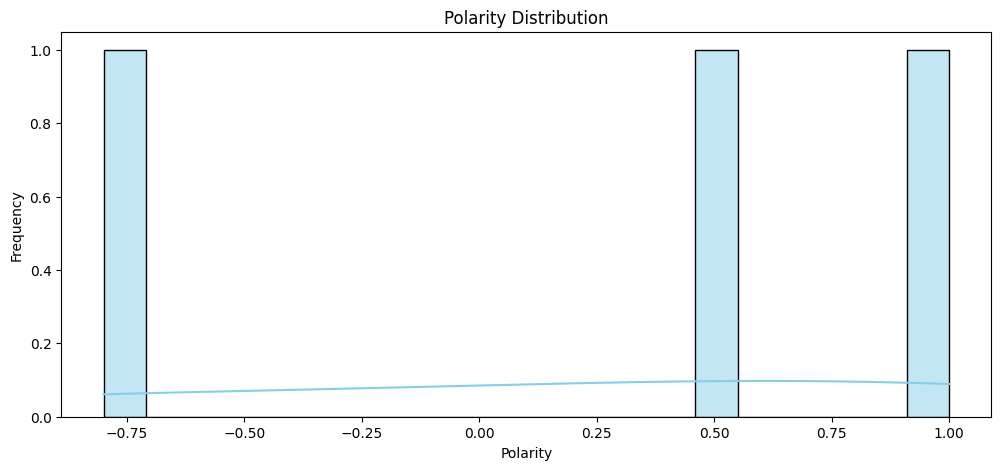

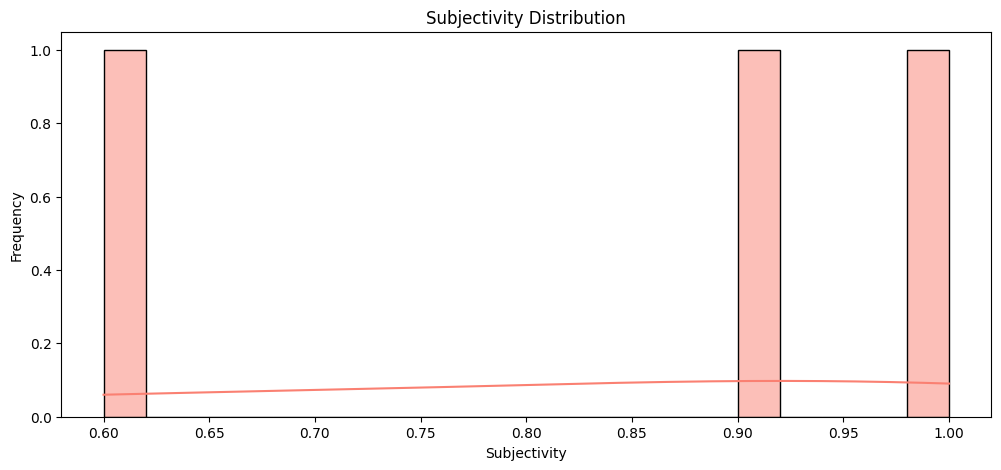

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

# Polarity distribution
plt.figure(figsize=(12,5))
sns.histplot(df['Polarity'], bins=20, kde=True, color='skyblue')
plt.title('Polarity Distribution')
plt.xlabel('Polarity')
plt.ylabel('Frequency')
plt.show()

# Subjectivity distribution
plt.figure(figsize=(12,5))
sns.histplot(df['Subjectivity'], bins=20, kde=True, color='salmon')
plt.title('Subjectivity Distribution')
plt.xlabel('Subjectivity')
plt.ylabel('Frequency')
plt.show()


## Interpretation & Conclusion
- **Polarity** values show the overall sentiment, with negative values indicating negative sentiment and positive values indicating positive sentiment.
- **Subjectivity** values show the degree of subjectivity, with higher values indicating more opinion-based content.
This project demonstrates basic text preprocessing and sentiment analysis using Python and the TextBlob library. You can expand it by using more advanced sentiment analysis models or larger datasets for more complex applications.
